In [1]:
import os
import re
import glob
import itertools
from timeit import default_timer as timer

import numpy as np
from PIL import Image

import guttae
from guttae import deeptrack as dt

## 1. Load model


In [6]:
PATH_TO_MODEL = ".\datasets\model\signed_distance_map\loss=1.0621706247329712_07-05-2021T021622_model_0"
print("Loading pretrained model from: \t", PATH_TO_MODEL)


Loading pretrained model from: 	 .\datasets\model\Jesus\loss=1.0621706247329712_07-05-2021T021622_model_0
C:\Users\Jesus\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:1: DeprecationWarning: invalid escape sequence \d
<>:1: DeprecationWarning: invalid escape sequence \d
<ipython-input-6-86b35de04206>:1: DeprecationWarning: invalid escape sequence \d
  PATH_TO_MODEL = ".\datasets\model\Jesus\loss=1.0621706247329712_07-05-2021T021622_model_0"


In [7]:
model = guttae.load_model(os.path.abspath(PATH_TO_MODEL))
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 1 160         input_1[0][0]                    
__________________________________________________________________________________________________
instance_normalization (Instanc (None, None, None, 1 32          conv2d_1[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         multiple             0           instance_normalization[0][0]     
                                                                 add[0][0]                    

## 2. Load validation set

In [9]:
dataset = guttae.DataLoader(path_to_dataset = "datasets")

Loading images from: 	 .\datasets
Training on 148 images
Validating on 22 images


## 3. Plot results

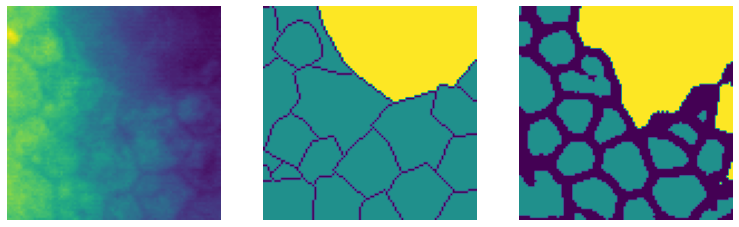

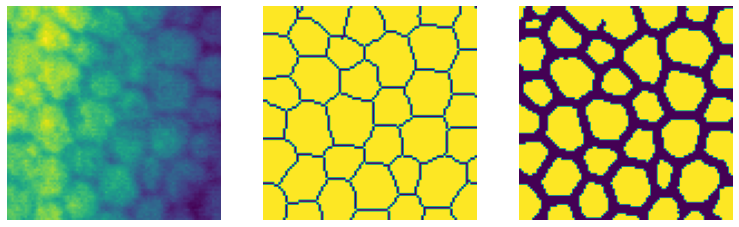

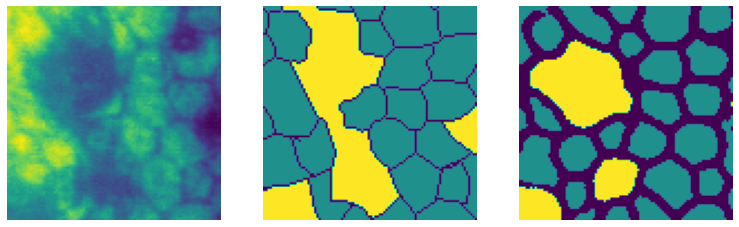

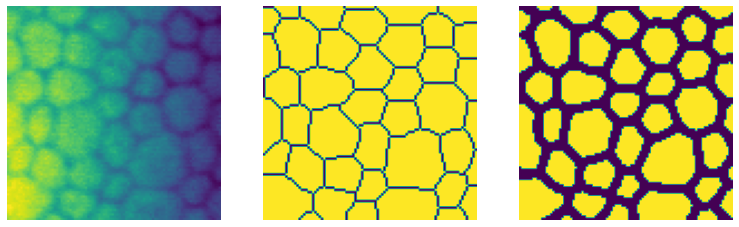

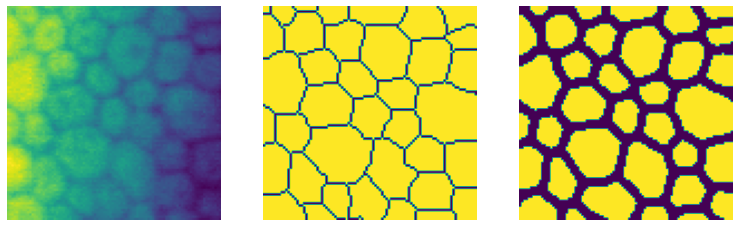

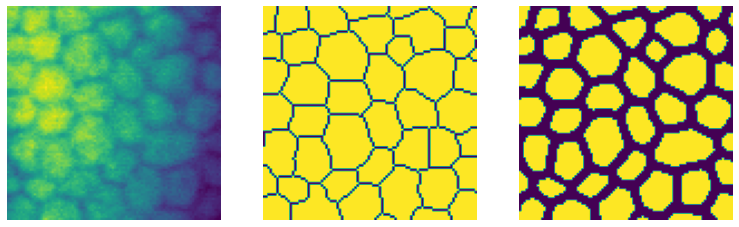

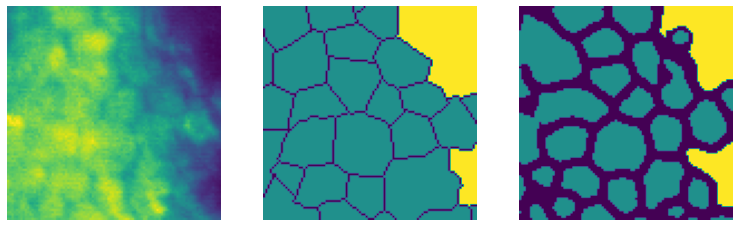

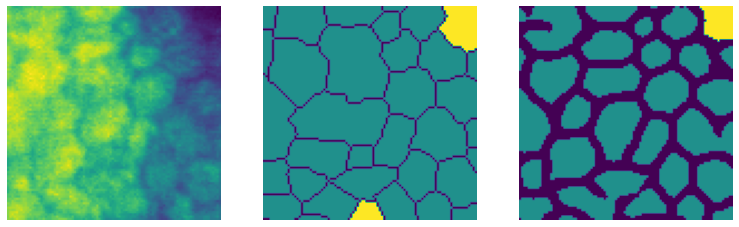

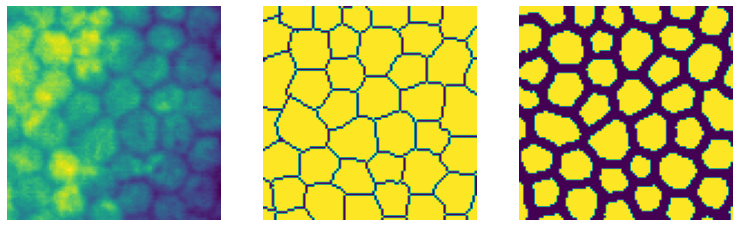

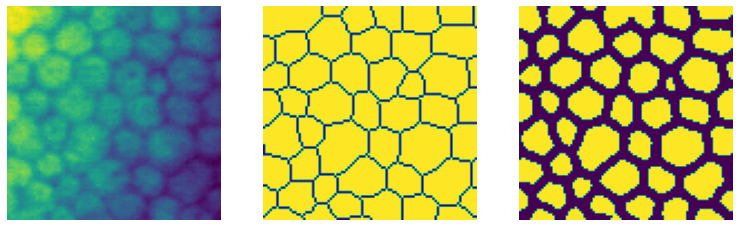

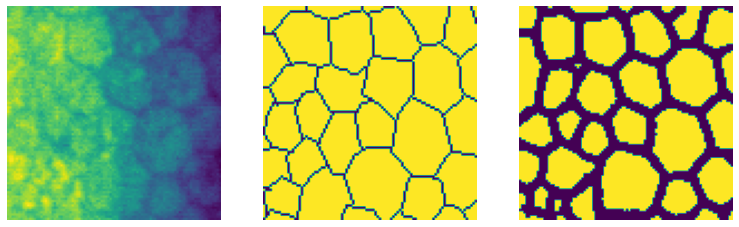

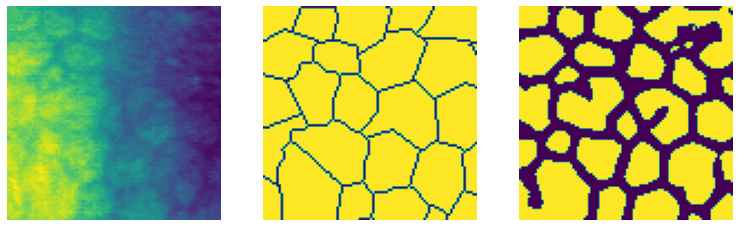

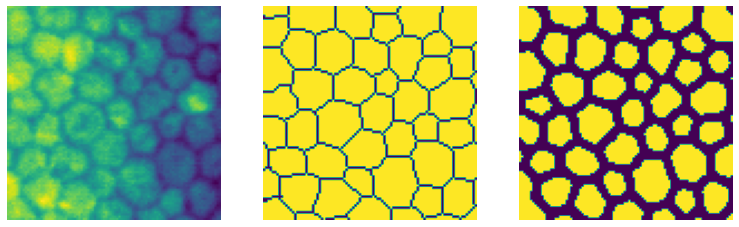

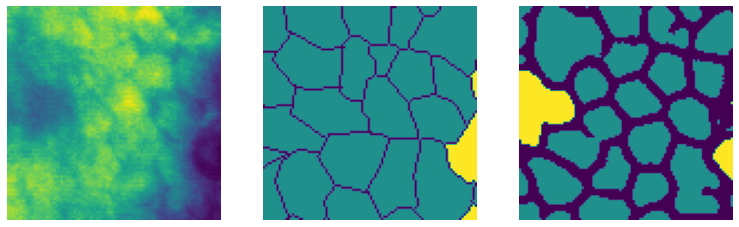

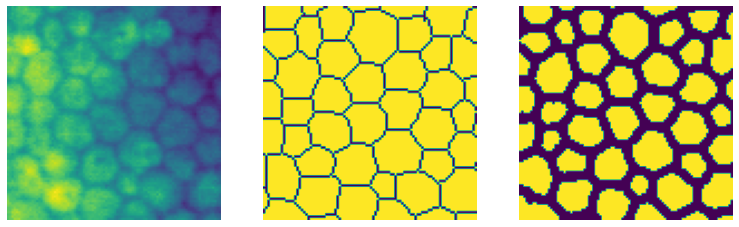

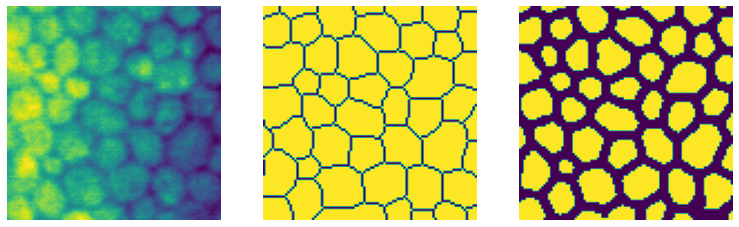

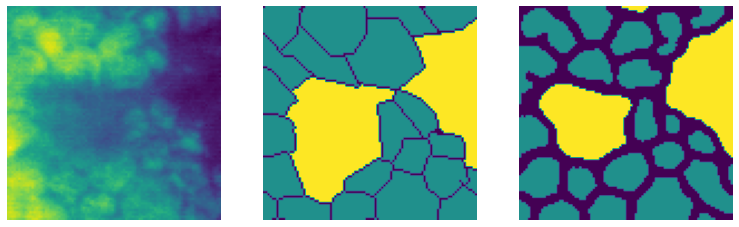

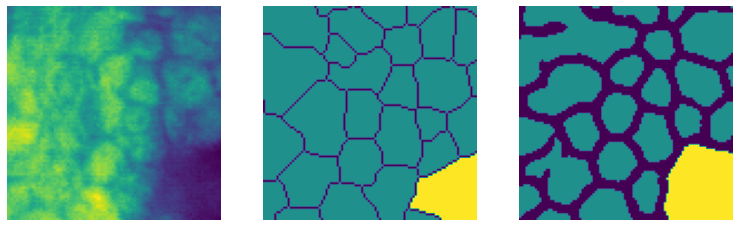

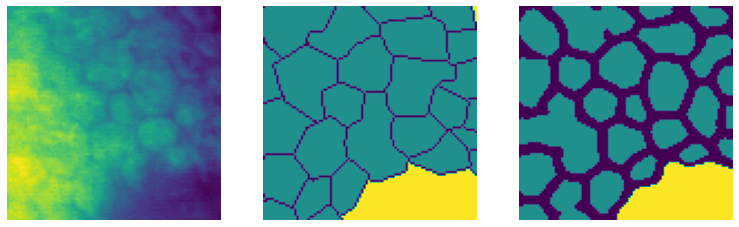

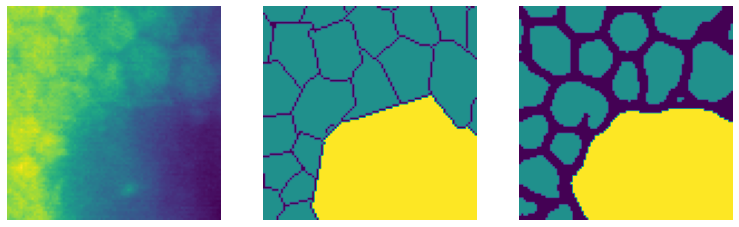

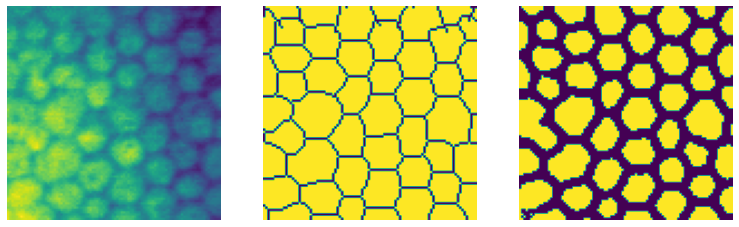

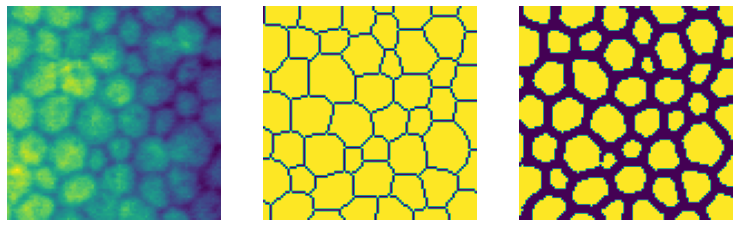

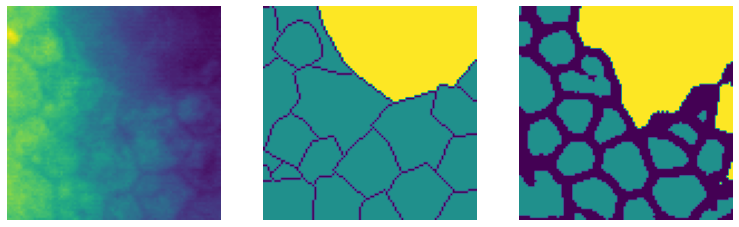

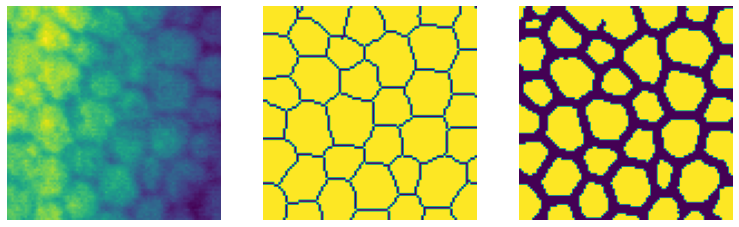

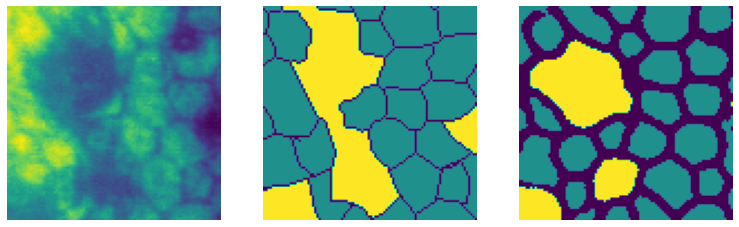

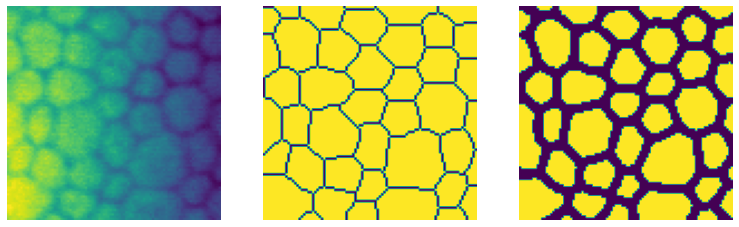

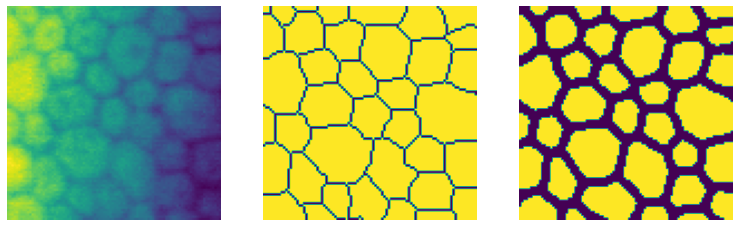

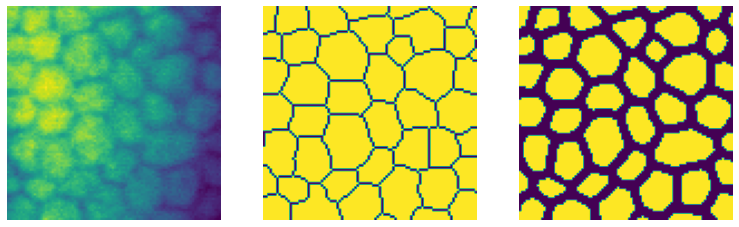

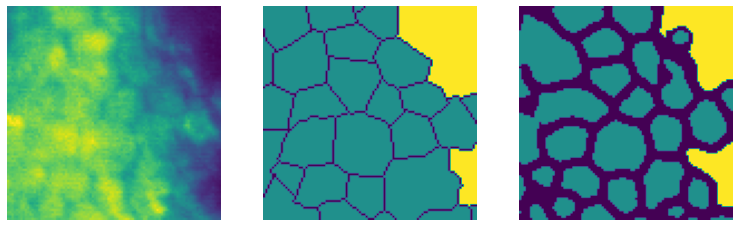

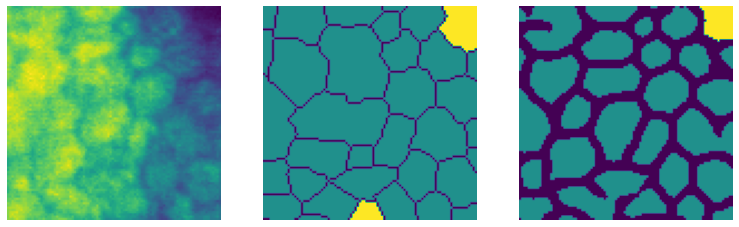

In [11]:
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu, threshold_local

from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage.filters import threshold_otsu


VALIDATION_SET = 30

for _ in range(VALIDATION_SET):

    fig, axs = plt.subplots(1, 3, figsize=(13, 7))

    image, label = dataset.update(validation=True).resolve()

    prediction = np.squeeze(
        model.predict(np.expand_dims(image, axis = 0), batch_size=1)[0,...]
    )

    label = (label > 0)*1.0 +  (label < 0)*2.0
    prediction = (prediction > 2)*1.0 +  (prediction < -2)*2.0

    axs[0].imshow(np.squeeze(image))
    axs[0].axis("off")

    axs[1].imshow(label)
    axs[1].axis("off")

    axs[2].imshow(prediction)
    axs[2].axis("off")

    plt.show()